In [1]:
from mpl_toolkits import mplot3d
import numpy as np
from math import *
import matplotlib.pyplot as plt

def setupView(limit):
    ax = plt.axes(projection="3d")
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(-limit, limit)
    ax.set_xlabel("X")
    ax.set_ylabel("Z")
    ax.set_zlabel("Y")
    return ax

OK


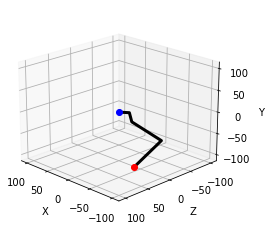

In [2]:
#%matplotlib notebook

setupView(110).view_init(elev=20., azim=135)

l1=25
l2=20
l3=80
l4=80

x=-55
y=-100
z=20

def legIK(x,y,z):

    """
    x/y/z=Position of the Foot in Leg-Space

    F=Length of shoulder-point to target-point on x/y only
    G=length we need to reach to the point on x/y
    H=3-Dimensional length we need to reach
    """

    F=sqrt(x**2+y**2-l1**2)
    G=F-l2  
    H=sqrt(G**2+z**2)

    theta1=-atan2(y,x)-atan2(F,-l1)

    D=(H**2-l3**2-l4**2)/(2*l3*l4)
    theta3=acos(D) 

    theta2=atan2(z,G)-atan2(l4*sin(theta3),l3+l4*cos(theta3))

    return(theta1,theta2,theta3)

def calcLegPoints(angles):

    (theta1,theta2,theta3)=angles
    theta23=theta2+theta3

    T0=np.array([0,0,0,1])
    T1=T0+np.array([-l1*cos(theta1),l1*sin(theta1),0,0])
    T2=T1+np.array([-l2*sin(theta1),-l2*cos(theta1),0,0])
    T3=T2+np.array([-l3*sin(theta1)*cos(theta2),-l3*cos(theta1)*cos(theta2),l3*sin(theta2),0])
    T4=T3+np.array([-l4*sin(theta1)*cos(theta23),-l4*cos(theta1)*cos(theta23),l4*sin(theta23),0])

    return np.array([T0,T1,T2,T3,T4])

def drawLegPoints(p):

    plt.plot([p[0][0],p[1][0],p[2][0],p[3][0],p[4][0]], 
             [p[0][2],p[1][2],p[2][2],p[3][2],p[4][2]],
             [p[0][1],p[1][1],p[2][1],p[3][1],p[4][1]], 'k-', lw=3)
    plt.plot([p[0][0]],[p[0][2]],[p[0][1]],'bo',lw=2)
    plt.plot([p[4][0]],[p[4][2]],[p[4][1]],'ro',lw=2)

drawLegPoints(calcLegPoints(legIK(x,y,z)))

print("OK")

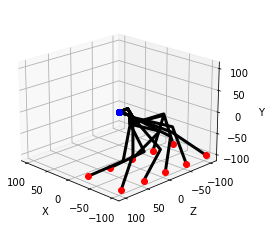

In [3]:
setupView(110).view_init(elev=20., azim=135)

for z in range(-100,150,50):
    drawLegPoints(calcLegPoints(legIK(x+25,y,z)))
    drawLegPoints(calcLegPoints(legIK(x-50,y,z)))

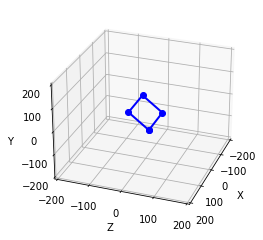

In [4]:
L = 120
W = 90

def bodyIK(omega,phi,psi,xm,ym,zm):

    """
    Calculate the four Transformation-Matrices for our Legs
    Rx=X-Axis Rotation Matrix
    Ry=Y-Axis Rotation Matrix
    Rz=Z-Axis Rotation Matrix
    Rxyz=All Axis Rotation Matrix
    T=Translation Matrix
    Tm=Transformation Matrix
    Trb,Trf,Tlb,Tlf=final Matrix for RightBack,RightFront,LeftBack and LeftFront
    """

    Rx = np.array([
        [1, 0, 0, 0], 
        [0, np.cos(omega), -np.sin(omega), 0],
        [0,np.sin(omega),np.cos(omega),0],
        [0,0,0,1]])

    Ry = np.array([
        [np.cos(phi),0, np.sin(phi), 0], 
        [0, 1, 0, 0],
        [-np.sin(phi),0, np.cos(phi),0],
        [0,0,0,1]])

    Rz = np.array([
        [np.cos(psi),-np.sin(psi), 0,0], 
        [np.sin(psi),np.cos(psi),0,0],
        [0,0,1,0],
        [0,0,0,1]])

    Rxyz=Rx@Ry@Rz

    T = np.array([[0,0,0,xm],[0,0,0,ym],[0,0,0,zm],[0,0,0,0]])
    Tm = T+Rxyz

    Trb = Tm @ np.array([
        [np.cos(pi/2),0,np.sin(pi/2),-L/2],
        [0,1,0,0],
        [-np.sin(pi/2),0,np.cos(pi/2),-W/2],
        [0,0,0,1]])

    Trf = Tm @ np.array([
        [np.cos(pi/2),0,np.sin(pi/2),L/2],
        [0,1,0,0],
        [-np.sin(pi/2),0,np.cos(pi/2),-W/2],
        [0,0,0,1]])

    Tlf = Tm @ np.array([
        [np.cos(pi/2),0,np.sin(pi/2),L/2],
        [0,1,0,0],
        [-np.sin(pi/2),0,np.cos(pi/2),W/2],
        [0,0,0,1]])

    Tlb = Tm @ np.array([
        [np.cos(pi/2),0,np.sin(pi/2),-L/2],
        [0,1,0,0],
        [-np.sin(pi/2),0,np.cos(pi/2),W/2],
        [0,0,0,1]])

    return (Tlf,Trf,Tlb,Trb,Tm)

omega =  pi/4 # Body xrot
phi =0#math.pi/4# Body YRot
psi = 0#math.pi/6 # Body ZRot

xm = 0
ym = 0
zm = 0

(Tlf,Trf,Tlb,Trb,Tm)=bodyIK(omega,phi,psi,xm,ym,zm)

FP=[0,0,0,1]

CP=[x@FP for x in [Tlf,Trf,Tlb,Trb]]

setupView(200).view_init(elev=27., azim=20)
plt.plot([CP[0][0],CP[1][0],CP[3][0], CP[2][0],CP[0][0]],
         [CP[0][2],CP[1][2],CP[3][2], CP[2][2],CP[0][2]],
         [CP[0][1],CP[1][1],CP[3][1], CP[2][1],CP[0][1]], 'bo-', lw=2)

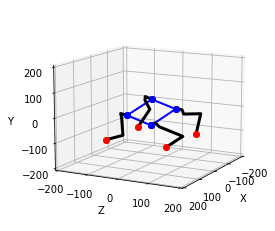

In [5]:
setupView(200).view_init(elev=12., azim=28)

Lp=np.array([[100,-100,100,1],[100,-100,-100,1],[-100,-100,100,1],[-100,-100,-100,1]])


def drawRobot(Lp,bodyIk):

    (Tlf,Trf,Tlb,Trb,Tm)=bodyIk

    FP=[0,0,0,1]
    CP=[x@FP for x in [Tlf,Trf,Tlb,Trb]]

    [plt.plot([x[0]],[x[2]],[x[1]],'yo-') for x in Lp]

    plt.plot([CP[0][0],CP[1][0],CP[3][0],CP[2][0],CP[0][0]],
             [CP[0][2],CP[1][2],CP[3][2],CP[2][2],CP[0][2]],
             [CP[0][1],CP[1][1],CP[3][1],CP[2][1],CP[0][1]], 'bo-', lw=2)

    # Invert local X
    Ix=np.array([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

    #Q=np.linalg.inv(Tlf)@(Lp[0])
    Q=np.linalg.inv(Tlf)@Lp[0]
    p=[Tlf@x for x in calcLegPoints(legIK(Q[0],Q[1],Q[2]))]
    drawLegPoints(p)

    Q=np.linalg.inv(Tlb)@Lp[2]
    p=[Tlb@x for x in calcLegPoints(legIK(Q[0],Q[1],Q[2]))]
    drawLegPoints(p)

    #TP=np.array([40,-150,0,1])

    Q=Ix@np.linalg.inv(Trf)@Lp[1]
    p=[Trf@Ix@x for x in calcLegPoints(legIK(Q[0],Q[1],Q[2]))]
    drawLegPoints(p)

    Q=Ix@np.linalg.inv(Trb)@Lp[3]
    p=[Trb@Ix@x for x in calcLegPoints(legIK(Q[0],Q[1],Q[2]))]
    drawLegPoints(p)

drawRobot(Lp,bodyIK(0.3,0.1,-0.4,xm,ym,zm))

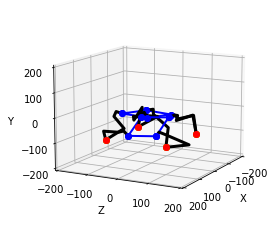

In [6]:
setupView(200).view_init(elev=12., azim=28)

drawRobot(Lp,bodyIK(-0.3,0.1,0.4,30,ym,zm))
drawRobot(Lp,bodyIK(-0.1,-0.1,-0.4,0,-60,-10))

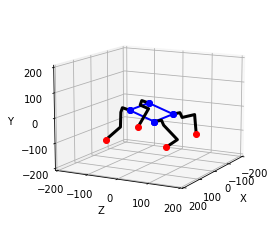

In [7]:
setupView(200).view_init(elev=12., azim=28)

omega =  pi/4
phi =0
psi = 0

xm = 0
ym = 0
zm = 0

l1=25
l2=20
l3=80
l4=80

L = 120
W = 90

Lp=np.array([[100,-100,100,1],[100,-100,-100,1],[-100,-100,100,1],[-100,-100,-100,1]])

sHp=np.sin(pi/2)
cHp=np.cos(pi/2)

Lo=np.array([0,0,0,1])

def bodyIK(omega,phi,psi,xm,ym,zm):
    Rx = np.array([[1,0,0,0],
                   [0,np.cos(omega),-np.sin(omega),0],
                   [0,np.sin(omega),np.cos(omega),0],[0,0,0,1]])
    Ry = np.array([[np.cos(phi),0,np.sin(phi),0],
                   [0,1,0,0],
                   [-np.sin(phi),0,np.cos(phi),0],[0,0,0,1]])
    Rz = np.array([[np.cos(psi),-np.sin(psi),0,0],
                   [np.sin(psi),np.cos(psi),0,0],[0,0,1,0],[0,0,0,1]])
    Rxyz=Rx@Ry@Rz

    T = np.array([[0,0,0,xm],[0,0,0,ym],[0,0,0,zm],[0,0,0,0]])
    Tm = T+Rxyz

    return([Tm @ np.array([[cHp,0,sHp,L/2],[0,1,0,0],[-sHp,0,cHp,W/2],[0,0,0,1]]),
           Tm @ np.array([[cHp,0,sHp,L/2],[0,1,0,0],[-sHp,0,cHp,-W/2],[0,0,0,1]]),
           Tm @ np.array([[cHp,0,sHp,-L/2],[0,1,0,0],[-sHp,0,cHp,W/2],[0,0,0,1]]),
           Tm @ np.array([[cHp,0,sHp,-L/2],[0,1,0,0],[-sHp,0,cHp,-W/2],[0,0,0,1]])
           ])

def legIK(point):
    (x,y,z)=(point[0],point[1],point[2])
    F=sqrt(x**2+y**2-l1**2)
    G=F-l2  
    H=sqrt(G**2+z**2)
    theta1=-atan2(y,x)-atan2(F,-l1)

    D=(H**2-l3**2-l4**2)/(2*l3*l4)
    theta3=acos(D) 

    theta2=atan2(z,G)-atan2(l4*sin(theta3),l3+l4*cos(theta3))

    return(theta1,theta2,theta3)

def calcLegPoints(angles):
    (theta1,theta2,theta3)=angles
    theta23=theta2+theta3

    T0=Lo
    T1=T0+np.array([-l1*cos(theta1),l1*sin(theta1),0,0])
    T2=T1+np.array([-l2*sin(theta1),-l2*cos(theta1),0,0])
    T3=T2+np.array([-l3*sin(theta1)*cos(theta2),-l3*cos(theta1)*cos(theta2),l3*sin(theta2),0])
    T4=T3+np.array([-l4*sin(theta1)*cos(theta23),-l4*cos(theta1)*cos(theta23),l4*sin(theta23),0])

    return np.array([T0,T1,T2,T3,T4])

def drawLegPoints(p):
    plt.plot([x[0] for x in p],[x[2] for x in p],[x[1] for x in p], 'k-', lw=3)
    plt.plot([p[0][0]],[p[0][2]],[p[0][1]],'bo',lw=2)
    plt.plot([p[4][0]],[p[4][2]],[p[4][1]],'ro',lw=2)    

def drawLegPair(Tl,Tr,Ll,Lr):
    Ix=np.array([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    drawLegPoints([Tl@x for x in calcLegPoints(legIK(np.linalg.inv(Tl)@Ll))])
    drawLegPoints([Tr@Ix@x for x in calcLegPoints(legIK(Ix@np.linalg.inv(Tr)@Lr))])

def drawRobot(Lp,angles,center):
    (omega,phi,psi)=angles
    (xm,ym,zm)=center

    FP=[0,0,0,1]
    (Tlf,Trf,Tlb,Trb)= bodyIK(omega,phi,psi,xm,ym,zm)
    CP=[x@FP for x in [Tlf,Trf,Tlb,Trb]]

    CPs=[CP[x] for x in [0,1,3,2,0]]
    plt.plot([x[0] for x in CPs],[x[2] for x in CPs],[x[1] for x in CPs], 'bo-', lw=2)

    drawLegPair(Tlf,Trf,Lp[0],Lp[1])
    drawLegPair(Tlb,Trb,Lp[2],Lp[3])

drawRobot(Lp,(0.4,0,0),(0,0,0))